In [7]:
import matplotlib.pyplot as plt
import pynmea2
import numpy as np
import pandas as pd
import scipy as sp
import scipy.signal as sig

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [3]:
csv = pd.read_csv("telemetry-subarktos.csv")

In [4]:
data = [[pynmea2.parse(csv['tpc.gps'][i]), float(csv['fc.alt'][i]), float(csv['timestamp'][i])] for i in range(len(csv)) if type(csv['tpc.gps'][i]) == str and len(csv['tpc.gps'][i]) >= 70 and csv['fc.alt'][i] >= 0]
lat = np.array([float(i[0].lat) for i in data])
lon = np.array([float(i[0].lon) for i in data])
alt = np.array([i[1] for i in data])

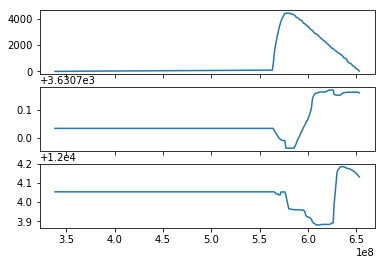

In [5]:
fig1, axes1 = plt.subplots(3, sharex = True)
axes1[0].plot([i[2] for i in data], sig.medfilt(alt, 7))
axes1[1].plot([i[2] for i in data], sig.medfilt(lat, 7))
axes1[2].plot([i[2] for i in data], sig.medfilt(lon, 7))

<IPython.core.display.Javascript object>


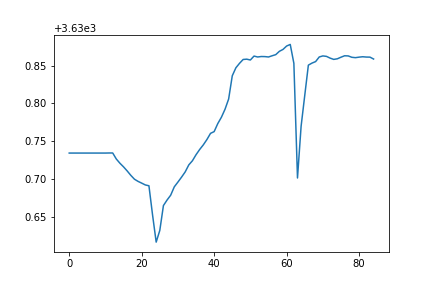

[3630.691  3630.6524 3630.6164]


In [7]:
plt.figure()
plt.plot(np.arange(len(lat)), lat)
print(lat[22:25])

<IPython.core.display.Javascript object>


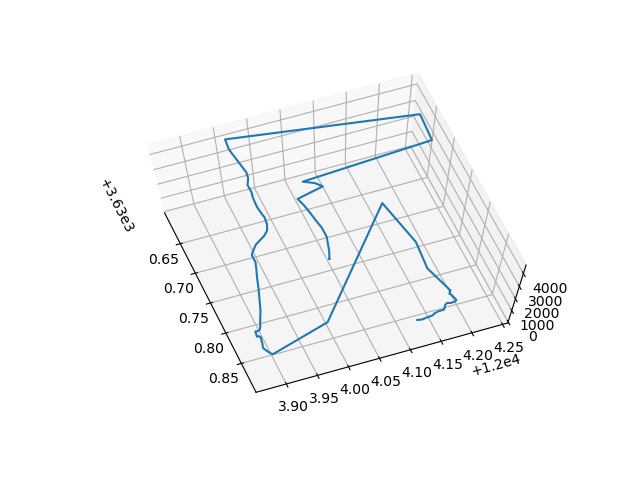

In [8]:
fig2 = plt.figure()
ax3d = fig2.add_subplot(111, projection = "3d")
ax3d.plot(lat, lon, alt)

In [10]:
bb_data = pd.read_csv("bb-4-20.csv")
bb_alt = sig.medfilt(np.array(bb_data[' 125'][16200:16500]), 3)*0.3048
bb_time = np.array(bb_data[bb_data.keys()[0]][16200:16500])
bb_vel = sig.medfilt(np.gradient(bb_alt, bb_time), 3)
bb_accel = sig.medfilt(np.gradient(bb_vel, bb_time), 3)

In [ ]:
fc_alt = sig.medfilt(np.array(alt), 3)*0.3048

<IPython.core.display.Javascript object>


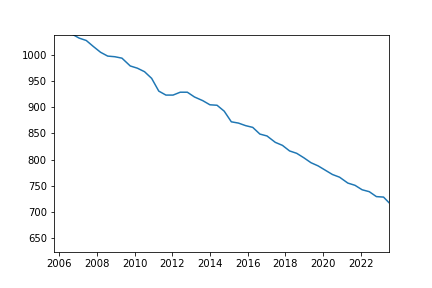

<IPython.core.display.Javascript object>


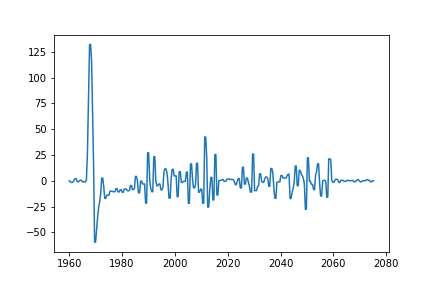

223.5568822773675


In [11]:
plt.figure()
plt.plot(bb_time, bb_alt)
plt.plot(bb_time, bb_vel)
plt.plot(bb_time, bb_accel)
plt.figure()
plt.plot(bb_time, bb_accel)
print(max(bb_vel))